In [1]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [2]:
df = pd.read_csv('/Users/annaventimiglia/Downloads/valladolidA.csv')

In [3]:
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1674,2248257159,779,0,0.0,Valladolid,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN
1676,2248274127,1,0,0.0,Valladolid,0.0,0.0,16,FormationSet,Successful,NaN,NaN,NaN


In [4]:
#filtering data
df = df[df['teamId']=='Barcelona']

In [5]:
df

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2248257083,1028,93,55.0,Barcelona,77.1,49.0,2,SavedShot,Successful,10.0,NaN,NaN
1671,2248257093,1029,93,57.0,Barcelona,86.9,49.6,2,CornerAwarded,Successful,10.0,NaN,NaN
1673,2248257153,1030,94,0.0,Barcelona,0.0,0.0,2,End,Successful,NaN,NaN,NaN
1675,2248257147,1031,0,0.0,Barcelona,0.0,0.0,14,End,Successful,NaN,NaN,NaN


In [6]:
#adding columns for passer and recipient
#shift - we are shifting the playerId from the row below the pass to get the recipient data
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#Creating new dataframes just for passing data
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']

/var/folders/_8/bm6p1skd78l1fw027rgbtlj00000gn/T/ipykernel_1159/2591566768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passer'] = df['playerId']
/var/folders/_8/bm6p1skd78l1fw027rgbtlj00000gn/T/ipykernel_1159/2591566768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['recipient'] = df['playerId'].shift(-1)


In [7]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [8]:
#finding the pass network for before when the first substitution occurred
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()

In [9]:
#looking at what minute the first substitution occurred
firstSub

70

In [10]:
#making the dataframe reflect before the first substitution
successful = successful[successful['minute']<firstSub]

In [11]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9.0,2.0
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2.0,8.0
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8.0,2.0
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2.0,8.0


In [12]:
#Changing the passer and recipient columns to be integers rather than floats
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipient'],downcast='integer')

#Updating the columns of the passer and recipient to reflect the changes from float to integer
successful['passer'] = pas
successful['recipient'] = rec

/var/folders/_8/bm6p1skd78l1fw027rgbtlj00000gn/T/ipykernel_1159/4012912740.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['passer'] = pas
/var/folders/_8/bm6p1skd78l1fw027rgbtlj00000gn/T/ipykernel_1159/4012912740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful['recipient'] = rec


In [13]:
successful

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,2248252877,782,69,30.0,Barcelona,83.1,42.8,2,Pass,Successful,9.0,89.9,21.5,9,2
1231,2248252881,783,69,32.0,Barcelona,90.5,23.0,2,Pass,Successful,2.0,78.6,36.9,2,8
1234,2248252897,785,69,36.0,Barcelona,84.6,27.7,2,Pass,Successful,8.0,90.3,14.3,8,2
1235,2248252905,786,69,37.0,Barcelona,90.7,14.3,2,Pass,Successful,2.0,88.4,15.3,2,8


In [14]:
#New dataframe to group all the passers and give the average values of all the x's and y's and tell you how many times a y occurred
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [15]:
average_locations

,x,y,count
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [16]:
#New dataframe to find the passes between each player
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#Joining pass_between and average_locations dataframes
pass_between = pass_between.merge(average_locations, left_on='passer', right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient', right_index=True, suffixes=['', '_end'])

In [17]:
pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
18,4,2,1,32.895833,43.518750,48,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
52,15,10,1,38.409091,74.378182,55,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


In [18]:
#Changing the dataset to only reflect pairings where pass_count was greater than 3
pass_between = pass_between[pass_between['pass_count']>3]

In [20]:
pass_between
#count shows the passer's total pass count
#count_end show the recipient's total pass count

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
74,21,2,4,55.663636,52.263636,55,68.274359,11.915385,39
83,28,2,10,49.156863,16.282353,51,68.274359,11.915385,39
27,8,4,8,53.332927,41.608537,82,32.895833,43.518750,48
50,15,4,9,38.409091,74.378182,55,32.895833,43.518750,48
84,28,4,13,49.156863,16.282353,51,32.895833,43.518750,48
2,1,8,4,7.124000,50.324000,25,53.332927,41.608537,82
11,2,8,11,68.274359,11.915385,39,53.332927,41.608537,82
19,4,8,6,32.895833,43.518750,48,53.332927,41.608537,82


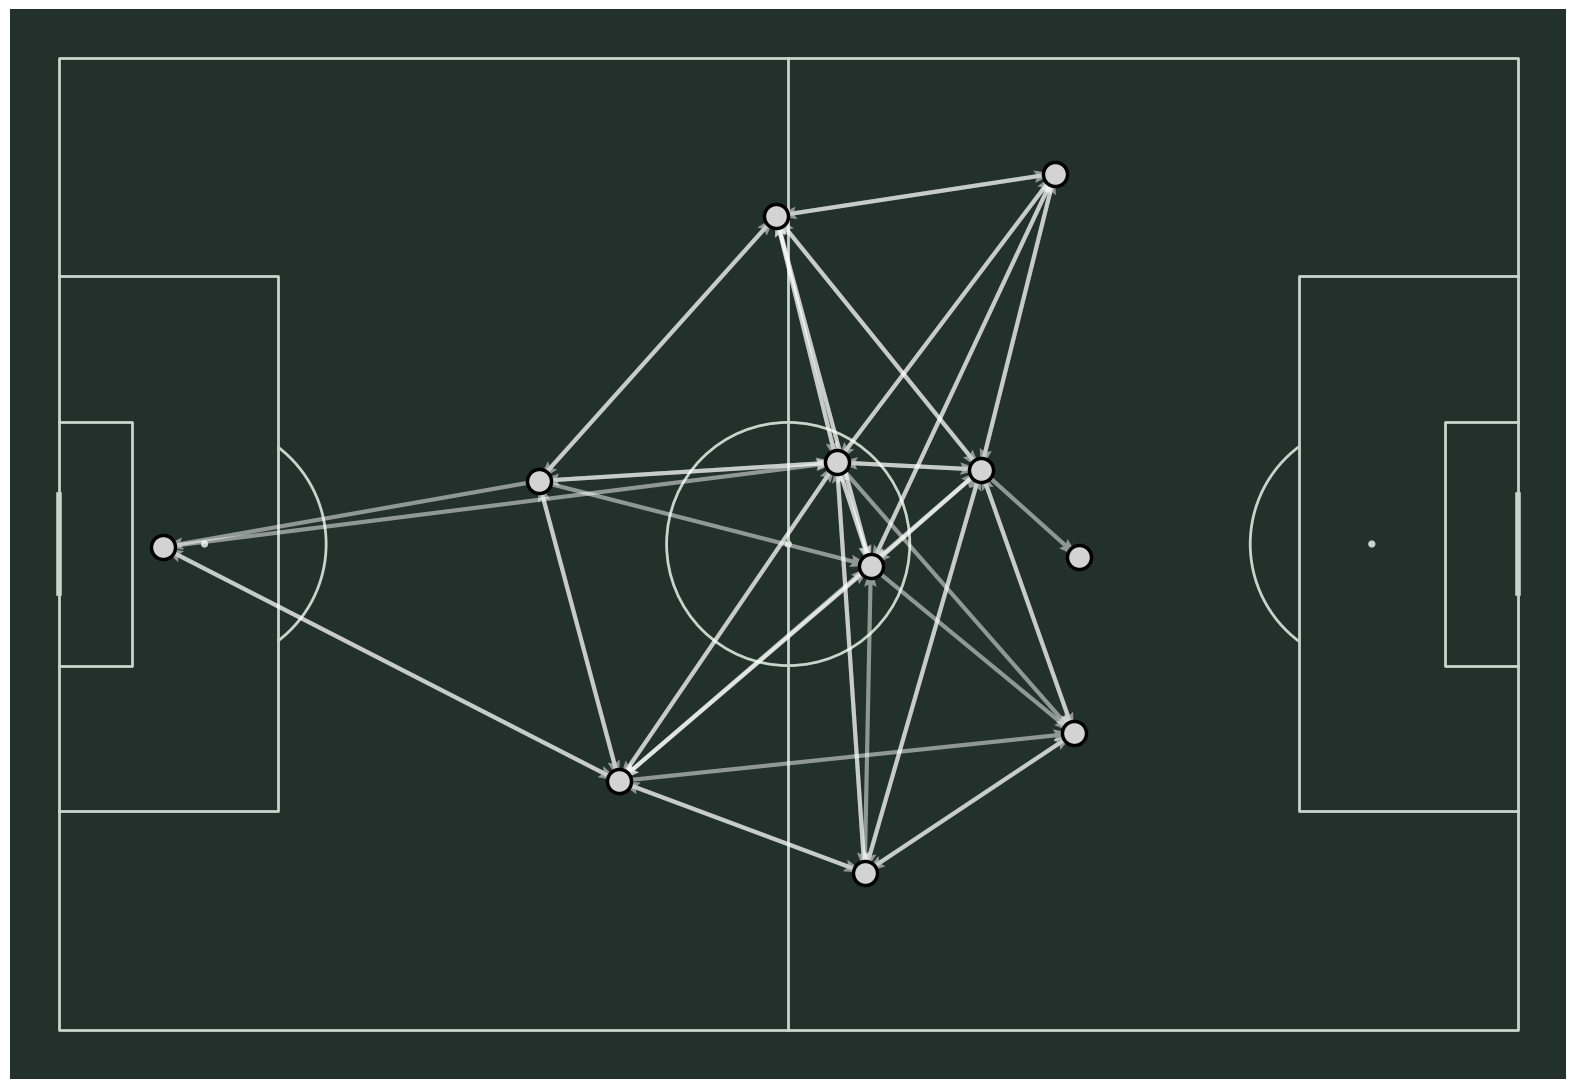

In [32]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16,11), constrained_layout=False, tight_layout=True)

#Matching the data coordinates - instead of 100x100, 120x80 (pitch dimensions)
arrows = pitch.arrows(1.2*pass_between.x,0.8*pass_between.y,1.2*pass_between.x_end,0.8*pass_between.y_end,ax=ax,
                     width=3, headwidth=3, color='white', zorder=1, alpha=.5)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,
                     s=300, color='#d3d3d3', edgecolors='black', linewidth=2.5, alpha=1, zorder=1, ax=ax)